# Project 1

+ Date: 2022/9/13

### Students

+ Wenbo Liu, wbliu20@lzu.edu.cn
+ Xuda Han,
+ Chengkai Lin,
+ Yifei Guo,

---

### Requirement1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results-2021-12-18.csv',usecols=['algorithm','no_datapoints','no_features','train_energy(J)'])
print(df)

               algorithm  no_datapoints  no_features  train_energy(J)
0               AdaBoost           2730         8169         1.037993
1          Decision Tree           3900         2451         0.068482
2                    SVM           3900         4084         0.530155
3               AdaBoost           3900         1633         0.243067
4     Bagging Classifier           3900         6535         0.699298
...                  ...            ...          ...              ...
3595       Random Forest           3900         4901         1.501089
3596  Bagging Classifier           1559         8169         0.170978
3597                 SVM           3900         5718         1.108957
3598       Random Forest           1559         8169         0.581876
3599            AdaBoost           3900         8169         0.992407

[3600 rows x 4 columns]


In [3]:
cols = ['algorithm','no_datapoints','no_features','train_energy(J)']
df1 = df.loc[:,['algorithm', 'train_energy(J)']]
df2 = df.loc[:,['no_datapoints', 'train_energy(J)']]
df3 = df.loc[:,['no_features', 'train_energy(J)']]

In [4]:
group1 = df1.groupby('algorithm').mean()
group2 = df2.groupby('no_datapoints').mean()
group3 = df3.groupby('no_features').mean()

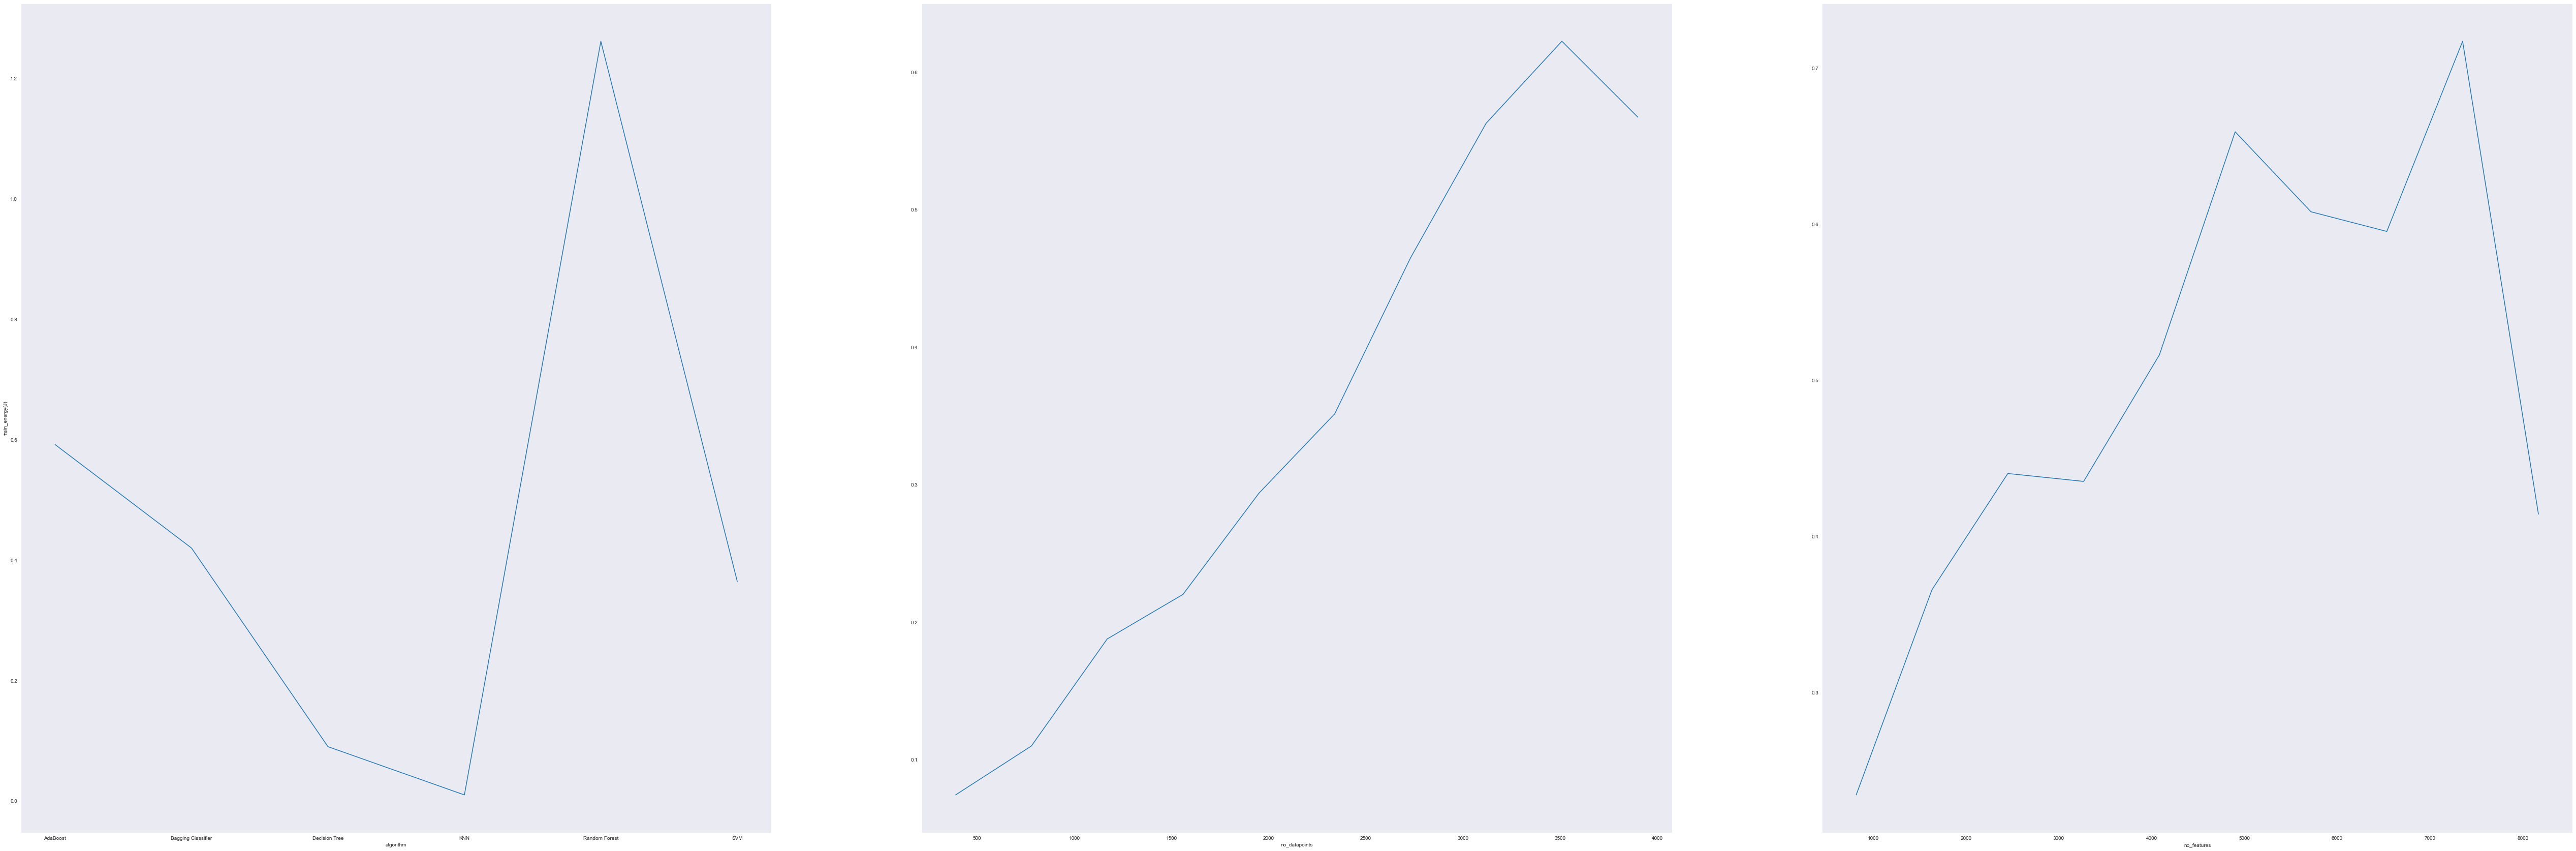

In [5]:
fig,axs = plt.subplots(1,3,figsize=(90,30))
axs[0].plot(group1)
axs[0].set_xlabel('algorithm')
axs[0].set_ylabel('train_energy(J)')
axs[0].grid(False)
axs[1].plot(group2)
axs[1].set_xlabel('no_datapoints')
axs[1].grid(False)
axs[2].plot(group3)
axs[2].set_xlabel('no_features')
axs[2].grid(False)

### Requirement2

In [6]:
df = pd.read_csv("results-2021-12-18.csv", usecols = ["algorithm", "experiment_id", "no_datapoints", "no_features", "train_energy(J)"])
df = df[df["algorithm"] == "SVM"].groupby(["experiment_id"]).agg("mean").groupby(["no_features"]).agg("mean")

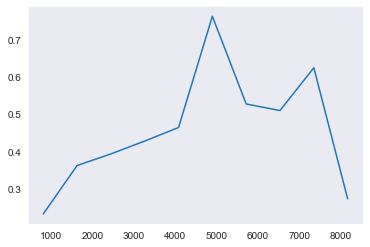

In [7]:
plt.figure()
plt.plot(df.loc[:,['train_energy(J)']])
plt.grid(False)
plt.show()

### Requirement3

In [8]:
df = pd.read_csv('results-2021-12-18.csv',usecols=['algorithm','no_datapoints','no_features','train_energy(J)'])
group = df.groupby(['algorithm','no_datapoints','no_features'])

In [9]:
mean = group.mean()
mean.reset_index(inplace=True)
result = mean.loc[mean.algorithm == 'KNN']
result

,algorithm,no_datapoints,no_features,train_energy(J)
57,KNN,389,8169,0.004276
58,KNN,779,8169,0.004801
59,KNN,1169,8169,0.006354
60,KNN,1559,8169,0.006491
61,KNN,1950,8169,0.007886
62,KNN,2340,8169,0.009557
63,KNN,2730,8169,0.015583
64,KNN,3119,8169,0.009204
65,KNN,3509,8169,0.011284
66,KNN,3900,817,0.010515


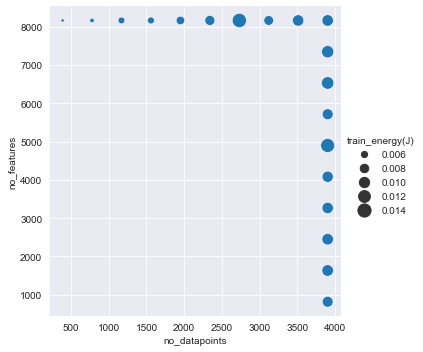

In [10]:
sns.relplot(data=result,x='no_datapoints',y='no_features',size='train_energy(J)',sizes=(10,200))